In [11]:
import sys
version=sys.version_info.major
import os
import numpy as np
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl


In [12]:
alphaI=0.28125
alphaN=1.38
m=0.0
Io=0.904
B=0.51/2.0
mu=1.0 #a.u.
hbar=1.0 #a.u.
Z=2.0
Factor=24.18884 #time[as]/a.u.

In [48]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

def step_func(x):
    return 0.5*(1+np.sign(x))

def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)# returns que eigen values and vectors of a hermitian matrix

def I(F):
    
    return Io + ((alphaN-alphaI)*F**2)/2.0

def Pot(n):
    
    t1= (m**2-1)/(8*n**2)
    
    b2=(Z-1)-(1+m)*np.sqrt(I(F)/2)
    
    t2= b2/(2*n)
    
    t3= n*F/8.0
    
    t4= (alphaI*F/n**2) * np.exp(-3.0/n)
    
    return t1-t2-t3+t4
def trian(n):
    return -F*n

In [49]:
steps=3000
# atomic units
xvec=np.linspace(0.01,40,steps) # creates de position vector
h=xvec[1]-xvec[0] #define the step
F=0.11

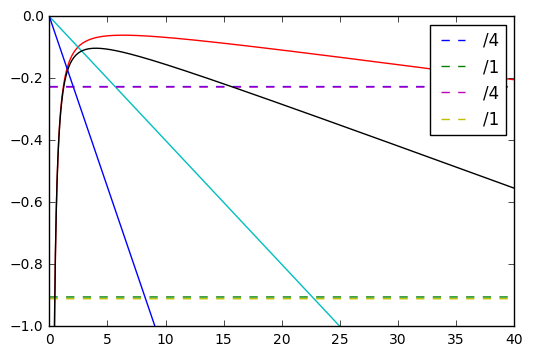

In [51]:
f=[0.04,0.11]
markers=["r","b"]
for i in range(2):
    F=f[i]
    Energy1=np.ones(steps)*(-I(F)/4)
    Energy2=np.ones(steps)*(-I(F))
    U=Pot(xvec)
    T=trian(xvec)
    plt.plot(xvec,Energy1, "--",label="/4")
    plt.plot(xvec,Energy2, "--",label="/1")
    plt.plot(xvec,U)
    plt.plot(xvec,T)
plt.ylim(-1,0)
plt.legend()
plt.show()
plt.close()

In [5]:
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
Laplacian

# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j]=np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U #en la diagonal del Hamiltoniano da el potentencial U
Hamiltonian+=(-0.5)*((hbar**2)/mu)*Laplacian
E,V=diagonalize_hamiltonian(Hamiltonian)
np.shape(E)

(3000,)

(-0.22745093651693027, -0.22602746875000002, 'Error=', 0.0062977644920878808)
(-0.22431574110439234, -0.22602746875000002, 'Error=', 0.0075730956731677092)


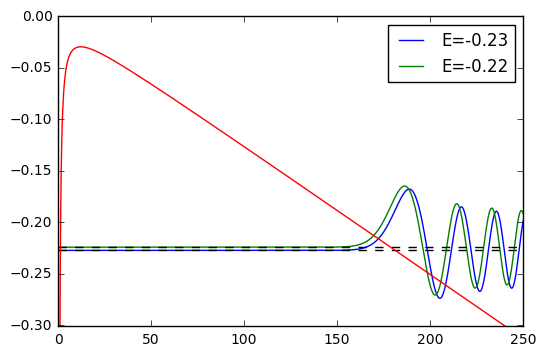

In [6]:
error=1.0/100
for i in range(len(E)):
    if( -(1.0-error)*I(F)/4.0 >E[i]>-(1.0+error)*I(F)/4.0 ):
        Line=np.ones(len(V[:,i]))*E[i]
        plt.plot(xvec,V[:,i] +E[i],label="E="+str(round(E[i],2)))
        plt.plot(xvec,Line,"k--")
        plt.plot()
        print(E[i],-I(F)/4.0,"Error=",abs(E[i]+I(F)/4.0)/(I(F)/4.0))
    
        


plt.plot(xvec,U)
plt.legend(loc=1)
plt.ylim(-I(F)/3.0,0)
plt.xlim(0,250)
plt.show()
plt.close()

(-0.42622266328814706, -0.22602746875000002)
(-0.42257933530234382, -0.22602746875000002)
(-0.4189475634414993, -0.22602746875000002)
(-0.41532720445328875, -0.22602746875000002)
(-0.41171811820080395, -0.22602746875000002)
(-0.40812016756791614, -0.22602746875000002)
(-0.40453321836840428, -0.22602746875000002)
(-0.40095713925865406, -0.22602746875000002)
(-0.39739180165377852, -0.22602746875000002)
(-0.39383707964699199, -0.22602746875000002)
(-0.3902928499320707, -0.22602746875000002)
(-0.3867589917287978, -0.22602746875000002)
(-0.38323538671120616, -0.22602746875000002)
(-0.37972191893856511, -0.22602746875000002)
(-0.37621847478888748, -0.22602746875000002)
(-0.37272494289494784, -0.22602746875000002)
(-0.36924121408265365, -0.22602746875000002)
(-0.36576718131164587, -0.22602746875000002)
(-0.36230273961809778, -0.22602746875000002)
(-0.35884778605955592, -0.22602746875000002)
(-0.35540221966178431, -0.22602746875000002)
(-0.35196594136750148, -0.22602746875000002)
(-0.348538853

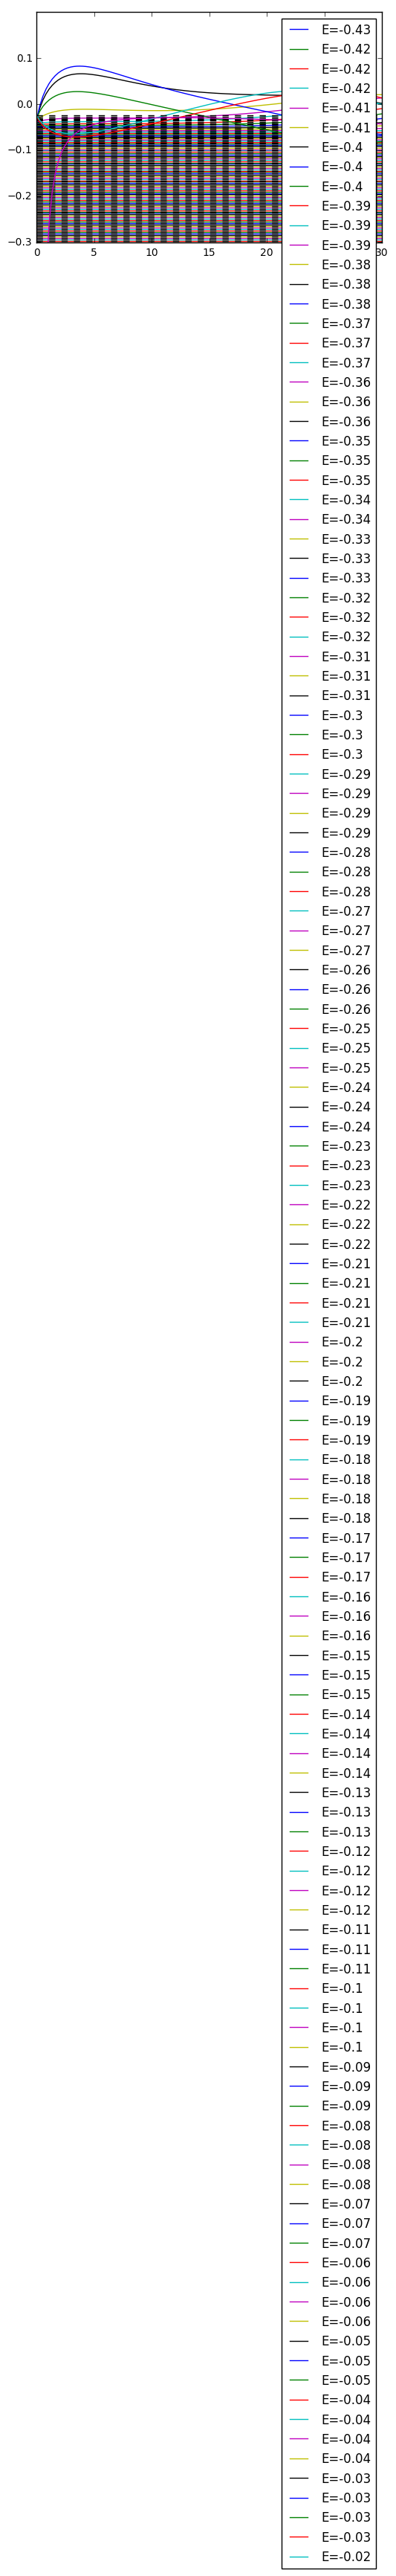

In [7]:
error=90.0/100
for i in range(len(E)):
    if( -(1.0-error)*I(F)/4.0 >E[i]>-(1.0+error)*I(F)/4.0 ):
        Line=np.ones(len(V[:,i]))*E[i]
        plt.plot(xvec,V[:,i] +E[i],label="E="+str(round(E[i],2)))
        plt.plot(xvec,Line,"k--")
        plt.plot()
        print(E[i],-I(F)/4.0)
    
        


plt.plot(xvec,U)
plt.legend(loc=1)
plt.ylim(-I(F)/3.0,0.2)
plt.xlim(0,30)
plt.show()
plt.close()